In [2]:
using FermiCG
using PyCall
using Plots
using LinearAlgebra
using Printf

┌ Info: Precompiling FermiCG [855c3b3a-d9bb-4919-8b00-0b3cfbdffb6f]
└ @ Base loading.jl:1278


In [4]:
molecule = "
Cr     0.0000000000000000        0.0000000000000000        0.0000000000000000
 C      2.2204460492503131E-016  -2.7755575615628914E-017   1.9917057295208032
 C    -0.87846650648631552        2.7526425702914095        8.6083041757504780E-002
 C     -1.0761576950394431       0.23113753473979082        2.8471318775165302
 C     -1.1834741844625540       -1.5149727689546213      -0.51720808710775112
 C    -0.64046943984698101        1.7019201793755492      -0.79113302438363120
 C     0.38313541946737661      -0.14760894947044556        4.7430917954455376
 C     -2.3981826618469495       -1.1371983499904696       -1.1629531573458314
 C    -0.78703012539088846        1.9251792729195778       -2.1766595473187929
 C    -0.94694441859747935       -2.8720274025563501      -0.28449817810753264
 C      1.2675486035981236      -0.34111643065868524        2.5473244736764737
 C      2.8532919894451458       0.81084835035514335      -0.53695345910377257
 C    -0.84768781673378957       0.16732165576408214        4.2288536707319935
 C     -2.4466354487054431       0.53405908269467073        2.3369587698900962
 C     -1.4500752689777832        4.2063918797218847       -1.7135874291038682
 C      1.8447581467596486      -0.15044875604942959      -0.74529139216019746
 C     -1.2196080072324820        3.1806521961006760       -2.6077367424376567
 C      1.4497486103270394      -0.41406740229129924        3.9104320191386206
 C     -1.8719562985282145       -3.8087564841763317      -0.76743634997262200
 C    -0.46350956422597145       0.88229951333441003       -3.2101390174352136
 C      2.0980529902698462       -1.2362018967118122       -1.5832447510334202
 C     -1.2746388876774302        4.0062097891114901      -0.35973621130034239
 C      4.3125807637164204      -0.48244848043286859       -1.9884685923416330
 C     -3.0175364813715486       -3.4167149530801062       -1.4297211076096679
 C      4.0890201693491788       0.62144735302408893       -1.1892157499516096
 C      2.6579632416610015        2.0326173172233650       0.32420185901476328
 C      3.3250466287606923       -1.4072753080589928       -2.1863969163234334
 C     -3.2910337679759127       -2.0687574123284449       -1.6030069165404066
 C     0.22769639084873555       -3.3547626604329754       0.50298336806312449
 H    -0.74908291912886749        2.5878657426972884        1.1557598548232713
 H     0.52169909423885907      -0.18865383461877616        5.8234692412657392
 H     -2.6190470124547369       -7.9615564016178836E-002  -1.3073054674813402
 H      2.1056053366359482      -0.54803621303401184        1.8817832534115551
 H     -1.6696625343573763       0.37511340509125235        4.9138939268477770
 H     -2.5159321759690250        1.5929335578216257        2.0877945479095450
 H     -3.1825360719843867       0.29121520777794885        3.1034945649271535
 H     -2.6415504618327947       -6.1674196510032475E-002   1.4452132917935852
 H     -1.7732678473955554        5.1814008611423468       -2.0782846232322365
 H     -1.3794488072567415        3.3544698802789674       -3.6718506138416998
 H      2.4232098090614969      -0.67832043096200012        4.3235223620381298
 H     -1.6799631547672826       -4.8712908083268083      -0.61824036225551382
 H      1.7818156160279486E-002   3.0582197576780185E-002  -2.7295131342096082
 H     0.20884017786450926        1.3056015319680905       -3.9563703658329579
 H     -1.3828708692567855       0.55325788080905913       -3.6945008603554528
 H      1.3086048435861439       -1.9653777659719456       -1.7653825433402255
 H     -1.4434488110406036        4.8173425991433581       0.34854817668510846
 H      5.2830227576777231      -0.61909201292002991       -2.4656172917905970
 H     -3.7084687699197083       -4.1661264770050481       -1.8158492475452319
 H      4.8817726034023723        1.3583934978819414       -1.0605535648237083
 H      1.8098085380581930        2.6076363916015639       -4.7398279383583097E-002
 H      3.5573003149848379        2.6475771565826656       0.29077695033125406
 H      2.4671355903890797        1.7251464250986643        1.3523781367055505
 H      3.5075041579243962       -2.2748837082173150       -2.8204828048481607
 H     -4.2148866134056782       -1.7551627721047318       -2.0890669144977436
 H      1.1446341708540637       -2.9565746012967433        6.8505086488290484E-002
 H     0.25662580138064695       -4.4441543959199583       0.48087599691829608
 H     0.13692099622491805       -3.0147144093110536        1.5345971594791816
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

cas_norb = 34
cas_nel =34
focc = 93 

basis = "def2-svp"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0,3,atoms,basis)

#SCF with relativistic effect
pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = true,spin =2,charge=0,
    basis = basis)


pymol.build()
print("symmetry: ",pymol.topgroup)
mf = pyscf.scf.UHF(pymol).x2c()
mf.verbose = 4
mf.conv_tol = 1e-5
mf.conv_tol_grad = 1e-5
mf.chkfile = "cr-def2svp-x2c.fchk"
#mf.init_guess = 'chkfile'
mf = mf.density_fit()
mf.with_df.auxbasis = "weigend"
mf.run(max_cycle=50)

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

symmetry: C1

******** <class 'pyscf.df.df_jk.density_fit.<locals>.DFHF'> ********
method = DFHF-SFX2C1E_SCF-UHF
initial guess = minao
damping factor = 0
level shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
DIIS start cycle = 1
DIIS space = 8
SCF tol = 1e-05
SCF gradient tol = 1e-05
max. SCF cycles = 50
direct_scf = False
chkfile to save SCF result = cr-def2svp-x2c.fchk
max_memory 4000 MB (current use 0 MB)
number electrons alpha = 111  beta = 109
******** <class 'pyscf.df.df.DF'> ********
auxbasis = weigend
max_memory = 4000
_cderi_to_save = /var/folders/w4/q6n49yl10v1fxv8jnns_cmp40000gn/T/tmptznrv2ek
init E= -2131.83776770339
  alpha nocc = 111  HOMO = -0.041206842550517  LUMO = -0.0190160944433104
  beta  nocc = 109  HOMO = -0.255757456617982  LUMO = -0.0515403205351564

WARN: system HOMO -0.041206842550517 >= system LUMO -0.0515403205351564

cycle= 1 E= -2119.04409019219  delta_E= 12.8  |g|= 1.93  |ddm|= 6.26
  alpha nocc = 111  HOMO = -0.351046107793464  LUMO = -0.34289231

 Hartree-Fock Energy: -2121.81459077

(111, 109)

(4.759450340482289, 4.476360280621876)

(34,)

(93,)

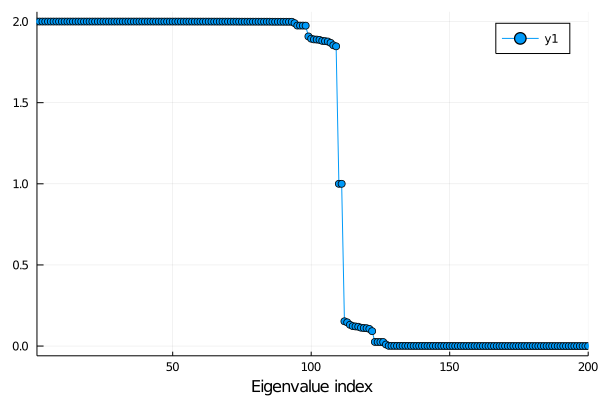

In [65]:
Ca = mf.mo_coeff[1,:,:]
Cb = mf.mo_coeff[2,:,:]
S = mf.get_ovlp()
na1 = mf.nelec[1]
nb1 = mf.nelec[2]
display((mf.nelec))

Ca_doc = Ca[:,1:na1]
Cb_doc = Cb[:,1:nb1]
Pa = Ca_doc * Ca_doc'
Pb = Cb_doc * Cb_doc'
P = Pa + Pb
P = sqrt(S)*P*sqrt(S)
P = (P + P') .* .5
F = eigen(P);
display(mf.spin_square((Ca_doc,Cb_doc),S))
act_list = []
doc_list = []

thresh = .002275
thresh = .005
for (idx,n) in enumerate(F.values)
#     @printf(" %4i = %12.8f\n",idx,n)
    if n < 2.0 - thresh
        if n > thresh
            push!(act_list,idx)
        end
    else
        push!(doc_list, idx)
    end
end
display(size(act_list))
display(size(doc_list))
Cact = inv(sqrt(S))*F.vectors[:,act_list]
Cdoc = inv(sqrt(S))*F.vectors[:,doc_list]
FermiCG.pyscf_write_molden(mol, Cact, filename="Cr_uhf2_act.molden")
FermiCG.pyscf_write_molden(mol, Cdoc, filename="Cr_uhf2_doc.molden")

p = plot( sort(F.values,rev=true), xlabel="Eigenvalue index", marker=true, xlims=(1,200))


In [66]:
Cact_loc = FermiCG.localize(Cact, "boys", mf)
pyscflo = pyimport("pyscf.lo")
Cact_loc = pyscflo.PM(pymol).kernel(Cact, verbose=4);
FermiCG.pyscf_write_molden(mol, Cact_loc, filename="Cr_uhf2_act_loc.molden")



Set conv_tol_grad to 0.000316228
macro= 1  f(x)= -33953.999621153  delta_f= -33954  |g|= 3.26202  3 KF 20 Hx
macro= 2  f(x)= -33954.399126301  delta_f= -0.399505  |g|= 0.462316  4 KF 21 Hx
macro= 3  f(x)= -33954.414366167  delta_f= -0.0152399  |g|= 0.152192  4 KF 23 Hx
macro= 4  f(x)= -33954.416283838  delta_f= -0.00191767  |g|= 0.0599157  3 KF 17 Hx
macro= 5  f(x)= -33954.416293917  delta_f= -1.00796e-05  |g|= 0.000196177  2 KF 5 Hx
macro= 6  f(x)= -33954.416293917  delta_f= -7.27596e-12  |g|= 4.04478e-05  1 KF 1 Hx
macro X = 6  f(x)= -33954.416293917  |g|= 4.04478e-05  12 intor 17 KF 87 Hx
Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 10.932394889058  delta_f= 10.9324  |g|= 1.50049  4 KF 20 Hx
macro= 2  f(x)= 13.90330252545  delta_f= 2.97091  |g|= 1.76477  3 KF 20 Hx
macro= 3  f(x)= 20.282221507027  delta_f= 6.37892  |g|= 2.37948  4 KF 20 Hx
macro= 4  f(x)= 25.416821924602  delta_f= 5.1346  |g|= 2.41782  4 KF 20 Hx
macro= 5  f(x)= 32.098891692872  delta_f= 6.68207  |g|= 1.1996  4 

1

In [11]:
#
# Using these orbitals, let's semi-algorithmically cluster the system. 
# We'll start by separately looking at the π and σ spaces
# Using these orbital orderings, we can inspect to see how local the exchange matrix is
h,j,k = FermiCG.pyscf_get_jk(mol, Pa+Pb);

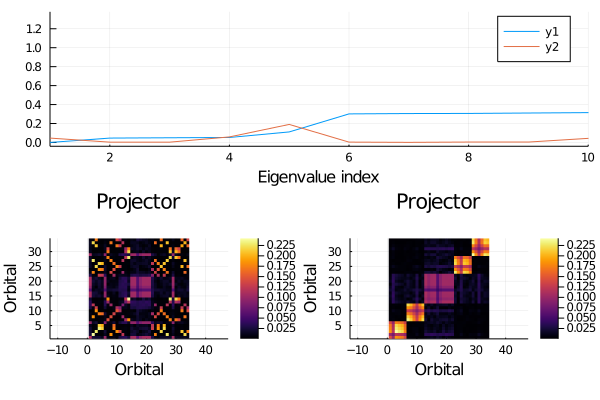

In [81]:
#
# From here, we could manually cluster. But we can instead try to use a k-means approach to spectral clustering. 
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

Cact = Cact_loc

operator = h + j - .5k

nvecs = 5
k1 = Cact'* operator *Cact
A = abs.(k1)
L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
F = eigen(L);

p1 = plot(F.values, xlabel="Eigenvalue",xlims=(1,10))
p1 = plot!( [[F.values[i+1]-F.values[i] for i in 1:length(F.values)-1]...,0], xlabel="Eigenvalue index",xlims=(1,10))

A_act = abs.(F.vectors[:,1:nvecs]*F.vectors[:,1:nvecs]')
clustering_act = clusterize(KMeansClusterizer(nvecs), A_act).assignments;
perm_act = sortperm(clustering_act)
p2 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector")
A_act = A_act[perm_act, perm_act]
p3 = heatmap(A_act, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="Projector")

Cact_sorted = Cact[:,perm_act]

p4 = heatmap(A, aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")
p5 = heatmap(A[perm_act, perm_act], aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")


FermiCG.pyscf_write_molden(mol, Cact_sorted, filename="act_sorted.molden");
plot(p1, p2, p3, layout = @layout [a ; b c] )
# plot(p1, p2, p3, p4, p5, fontsize=2, layout = @layout [a ; b c; d e] )
# savefig("clustering.pdf")


In [85]:
# The metal cluster is too big, so let's subdivide it
m = Cact_sorted[:,13:22]'*operator*Cact_sorted[:,13:22]
F = eigen(m)
Ctmp = Cact_sorted[:,13:22]*F.vectors
FermiCG.pyscf_write_molden(mol, Ctmp, filename="subdivide.molden");
Ctmp = Ctmp[:,[5,6,1,10,2,3,4,7,8,9]]

Cact_sorted[:,13:22] = Ctmp
heatmap(abs.(Cact_sorted'*operator*Cact_sorted), aspect_ratio=:equal, xlabel="Orbital", ylabel= "Orbital", title="F")

FermiCG.pyscf_write_molden(mol, Cact_sorted, filename="act_sorted.molden");


In [87]:
clusters_in = [
    (1:6),   # Benzene 1
    (7:12),  # Benzene 2
    (13:14), # Singly Occ d
    (15:16), # bond/antibond 4s/sigma
    (17:22), # bond/antibond 3d/sigma
    (23:28), # Benzene 3
    (29:34)  # Benzene 4
]
init_fspace = [
    (3,3),
    (3,3),
    (2,0),
    (1,1),
    (3,3),
    (3,3),
    (3,3)
];

In [ ]:
#
# Build Integrals
ints = FermiCG.pyscf_build_ints(mol, Cact_sorted, 2.0*Cdoc*Cdoc');
@printf(" Ecore: %12.8f", ints.h0)

In [ ]:
# define clusters
clusters = [Cluster(i,collect(clusters_in[i])) for i = 1:length(clusters_in)]
display(clusters)

rdm1 = zeros(size(ints.h1))

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints, clusters, init_fspace, rdm1,
                                        max_iter_oo=100, verbose=0, gconv=1e-6, method="bfgs");
